In [291]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import learning.utils as ut

system_name = 'dql_const'
run_name = 'state_of_art1'
data_dir = './data/' + system_name + '/' + run_name + '/'

#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [292]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 15.0
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 1000.0
eta0 0.1
eta_decay_start 1000000.0
eta_decay_rate 0.9
eta_c 1000.0
eps0 0.01
eps_decay_start 8000000.0
eps_decay_rate 0.6
eps_c 100.0
optimizer sgd
loss mse
buffer_size 1.0
batch_size 1.0
max_power 0.0


In [293]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[   1500    3000    4500    6000    7500    9000   10500   12000   13500
   15000   16500   18000   19500   21000   22500   24000   25500   27000
   28500   30000   31500   33000   34500   36000   37500   39000   40500
   42000   43500   45000   46500   48000   49500   51000   52500   54000
   55500   57000   58500   60000   61500   63000   64500   66000   67500
   69000   70500   72000   73500   75000   76500   78000   79500   81000
   82500   84000   85500   87000   88500   90000   91500   93000   94500
   96000   97500   99000  100500  102000  103500  105000  106500  108000
  109500  111000  112500  114000  115500  117000  118500  120000  121500
  123000  124500  126000  127500  129000  130500  132000  133500  135000
  136500  138000  139500  141000  142500  144000  145500  147000  148500
  150000  151500  153000  154500  156000  157500  159000  160500  162000
  163500  165000  166500  168000  169500  171000  172500  174000  175500
  177000  178500  180000  181500  183000  184500  1

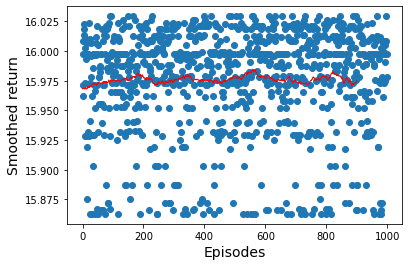

In [294]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=1)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

[15.862733   15.86290613 15.86637848 15.86684416 15.87187138 15.87526934
 15.88716181 15.88731604 15.9027804  15.91786481 15.91885727 15.92529295
 15.92804465 15.92889447 15.93173584 15.93290529 15.9396147  15.940436
 15.94142579 15.95169276 15.95248451 15.95544714 15.95772816 15.96098431
 15.96171312 15.96519483 15.96584354 15.96615016 15.97168994 15.97169963
 15.97284728 15.97325353 15.97457831 15.97528407 15.97545842 15.97583966
 15.97777548 15.97814133 15.97875287 15.9820586  15.98318298 15.98549465
 15.98722555 15.9884455  15.98895887 15.99082385 15.99097734 15.99247505
 15.99350302 15.99357767 15.99592471 15.99632101 15.99667236 15.99734265
 15.99737118 15.99753704 15.99762107 15.99789791 15.998894   15.99914037
 16.00237293 16.00474665 16.00703234 16.00864119 16.00872033 16.00927656
 16.01013464 16.01178558 16.01289071 16.01395434 16.01817988 16.01840862
 16.02072222 16.0212827  16.02304177 16.02370652 16.0262165  16.02935124]


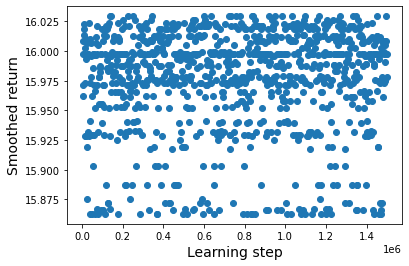

In [295]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)
print(np.unique(r_traj))
plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(150001, 15, 7, 3, 3)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


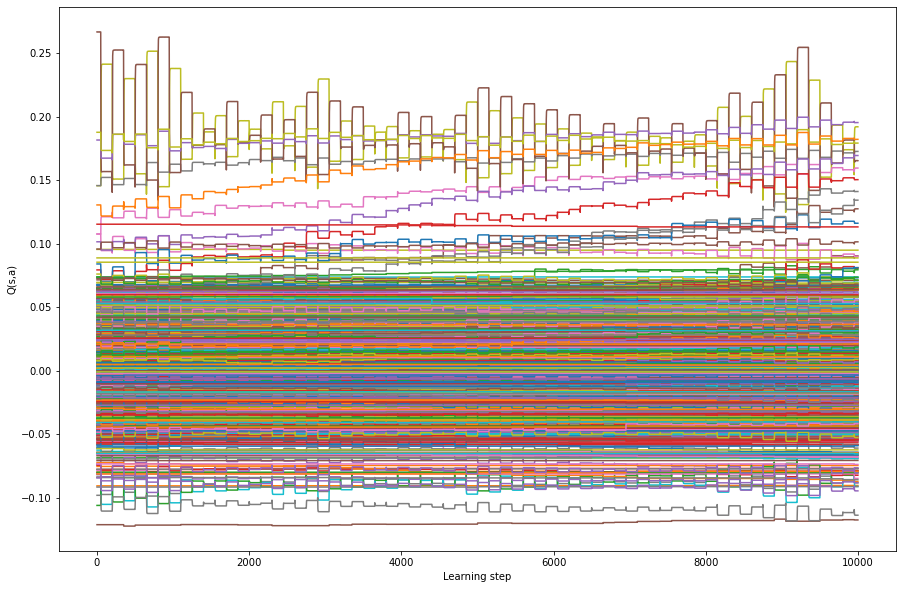

(14, 0, 0, 0)


In [302]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
#for i in [882]:
    plt.plot(Q_traj[10000:20000:1,i], '-')
print(np.unravel_index(np.where(Q_traj[0]>16.5)[0], (15,7,3,3)))
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()
print(np.unravel_index(882, (15,7,3,3)))

In [221]:
print(Q_traj[23])

[-4.71233763e-02  1.10020489e-02  4.74492833e-02 -8.19022954e-02
  8.90446529e-02 -1.49629861e-02  2.27425322e-02  1.99773908e-03
 -8.86434391e-02  6.48927465e-02 -4.20998931e-02  3.07235345e-02
 -2.46864557e-03  6.75337091e-02 -7.68592432e-02  9.01341811e-02
 -4.69171032e-02  5.92189506e-02  7.39313588e-02 -8.65998417e-02
 -1.03911981e-02  3.78667563e-03 -1.67297125e-02 -9.59577411e-03
  6.96096793e-02  1.91585273e-02  4.61253002e-02  5.95352277e-02
  2.64134705e-02 -7.33091831e-02 -5.92707098e-02  2.49937922e-02
  3.26040611e-02  8.46754685e-02  4.61064354e-02 -9.43728909e-02
  4.53345403e-02  2.60581672e-02 -6.67917505e-02 -6.73259795e-02
 -1.19925067e-02 -5.05734272e-02 -7.46758655e-02  6.29226491e-02
  2.87185609e-03 -1.85732022e-02 -3.29796448e-02 -8.27698261e-02
 -8.09014738e-02  8.87951925e-02 -3.05091068e-02 -2.65015662e-03
 -8.47491622e-03  1.79608539e-02  8.31838623e-02 -2.38281637e-02
  5.92816249e-02  4.62443605e-02  5.49949035e-02 -6.24825805e-02
 -7.77679086e-02 -1.36062

In [71]:
Q_traj[100000].shape

IndexError: index 100000 is out of bounds for axis 0 with size 30001

In [ ]:
print(np.where(Q_traj[100000]>16)[0])

In [10]:
input=np.zeros(105)
S_t=(10, 3)
input[S_t[0]*15+S_t[1]]=1

IndexError: index 153 is out of bounds for axis 0 with size 105

In [553]:
import torch
torch.nn.functional.one_hot(torch.tensor([1*7+4]), num_classes=105).reshape(15, 7)

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


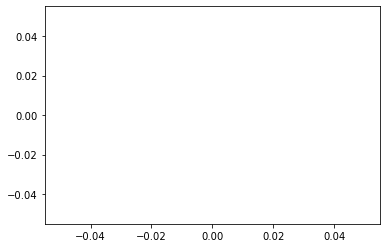

In [252]:
l = np.load(data_dir+"loss_traj.npy")
print(l)
plt.plot(l, lw=1)
plt.show()

In [74]:
Q = np.load(data_dir+"best_quality.npy")
#ind = np.argmax(Q_traj[4800])
#np.unravel_index(ind, Q.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/state_of_art/best_quality.npy'

In [75]:
beta_importance=np.mean(np.var(Q, axis=2))

In [76]:
np.var(Q, axis=0).shape

(7, 1, 3, 3)

In [77]:
beta_importance

0.0

In [78]:
np.var(Q)

0.24340283029431797

In [79]:
att_importance=np.mean(np.var(Q, axis=0))
bank_importance=np.mean(np.var(Q, axis=1))
print(att_importance, bank_importance)

0.19595938513112895 0.19133971057069318


[25.          0.         43.30127019]


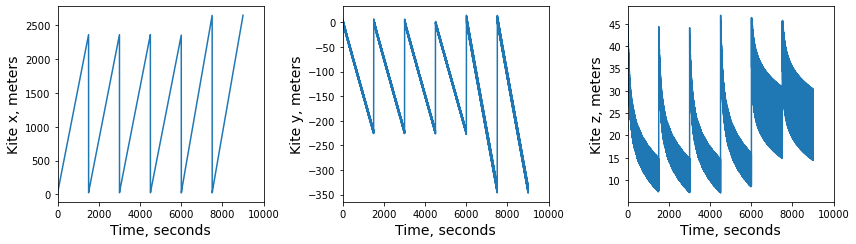

In [109]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

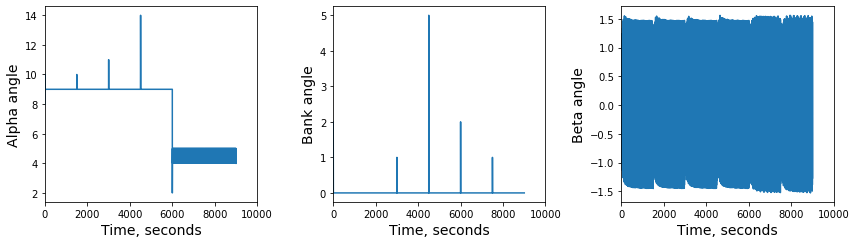

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

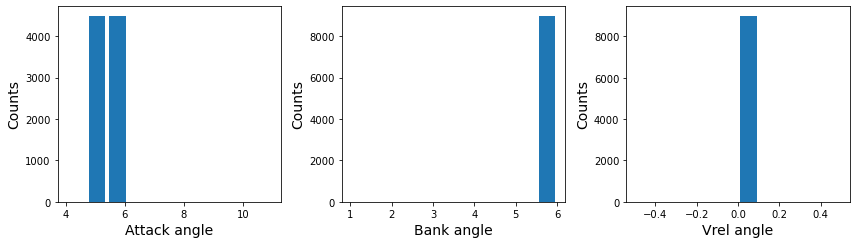

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()